In [1]:
import os
import glob
# %matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import seaborn as sns

params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
         }
         #'axes.legend.fontsize':'medium',}
#plt.rcParams.keys()
plt.rcParams.update(params)

In [2]:
def get_data(names):
    folder_path = './'
    paths = [os.path.join(folder_path, name) for name in names]
    return {name: torch.load(fp) for name, fp in zip(names, paths)}

def plot(names, curve_type='train', labels = None, ylim=(30,110)):
    plt.figure()
    plt.ylim(ylim)# if curve_type == 'train' else 96)
    curve_data = get_data(names)
    # print(curve_data)
    for i, label in zip(curve_data.keys(),labels):
        acc = np.array(curve_data[i]['{}_loss'.format(curve_type.lower())])
        
        if label == 'AdaBelief':
            plt.plot(acc, '-' ,label = label)
        else:
            plt.plot(acc, '--',label=label)
    
    plt.grid()
    plt.legend(fontsize=14, loc='lower left')
    plt.title('{} set perplexity ~ training epoch'.format(curve_type))
    plt.xlabel('Training Epoch')
    plt.ylabel('Perplexity')


In [18]:
files = glob.glob('curve/PTB.pt*adabelief-nlayers3*lr*-seed*')
files_adab = sorted([file for file in files if len(file.split('seed')[-1]) == 3])

In [19]:
files_adab


['curve/PTB.pt-niter-200-optimizer-adabelief-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed141',
 'curve/PTB.pt-niter-200-optimizer-adabelief-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed142',
 'curve/PTB.pt-niter-200-optimizer-adabelief-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed143',
 'curve/PTB.pt-niter-200-optimizer-adabelief-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed144',
 'curve/PTB.pt-niter-200-optimizer-adabelief-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed145']

In [24]:
files = glob.glob('curve/PTB.pt*adabelief+-nlayers3*lr*-seed*')
files_adamplus = sorted([file for file in files if len(file.split('seed')[-1]) == 3])

In [26]:
files_adamplus

['curve/PTB.pt-niter-200-optimizer-adabelief+-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed141',
 'curve/PTB.pt-niter-200-optimizer-adabelief+-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed142',
 'curve/PTB.pt-niter-200-optimizer-adabelief+-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed143',
 'curve/PTB.pt-niter-200-optimizer-adabelief+-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed144',
 'curve/PTB.pt-niter-200-optimizer-adabelief+-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed145']

In [27]:
data_adamplus = get_data(files_adamplus)

/tmp/ipykernel_304103/2118657022.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return {name: torch.load(fp) for name, fp in zip(names, paths)}


In [28]:
data_adab = get_data(files_adab)

/tmp/ipykernel_304103/2118657022.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return {name: torch.load(fp) for name, fp in zip(names, paths)}


In [29]:
def wide_df(data):
    rows = []
    for run, losses in data.items():
        for loss_type, values in losses.items():
            for i, val in enumerate(values, start=1):
                seed = int(run.split('-')[-1][4:])
                lr = float(run.split('lr')[-1].split('-')[0])
                rows.append({
                    # "run": run,
                    "iteration": i,
                    "loss_type": loss_type,
                    "loss": val,
                    "seed": seed,
                    "lr": lr
                })
        
    return pd.DataFrame(rows)

In [30]:
df_adab = wide_df(data_adab)
df_adab['optimizer'] = 'AdaBelief'
df_adamplus = wide_df(data_adamplus)
df_adamplus['optimizer'] = 'Adam+'


In [31]:
df = pd.concat([df_adab, df_adamplus], axis=0)

In [32]:
# df = df[df['seed'] == 142]

In [33]:
df.columns

Index(['iteration', 'loss_type', 'loss', 'seed', 'lr', 'optimizer'], dtype='object')

In [34]:
group = df.groupby(['iteration', 'optimizer', 'loss_type', "lr"])
agg = group.agg(
    loss_avg = ("loss", "mean")
).reset_index()

In [35]:
agg = agg.rename(columns={"loss_avg": "Perplexity"})
agg = agg.rename(columns={"iteration": "Epoch"})
agg = agg.rename(columns={"loss_type": "type"})

In [36]:
agg.loc[agg['type'] == 'test_loss', 'type'] = 'validation'
agg.loc[agg['type'] == 'train_loss', 'type'] = 'training'

In [37]:
agg = agg[agg['type'] == 'validation']

(61.0, 80.0)

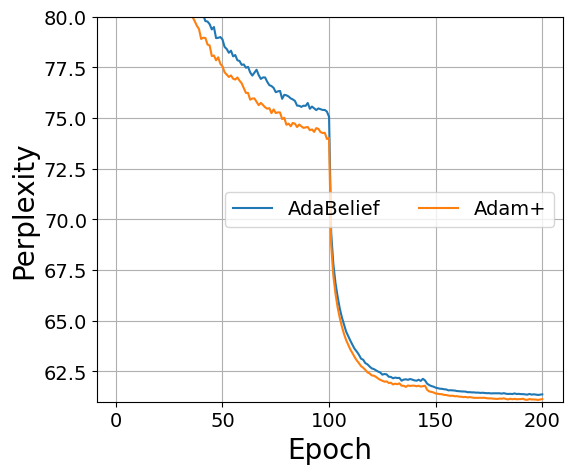

In [46]:
plt.figure()
sns.lineplot(data=agg, x='Epoch', y='Perplexity', hue='optimizer')
plt.gcf().set_size_inches(5.5, 4.5)
plt.gca().tick_params(axis='both', labelsize=14)
plt.tight_layout(pad=0.1)
plt.legend(fontsize=14, ncol=2)
plt.grid()
# plt.savefig("1lstm.pdf",
#             dpi=300,  # facecolor='w', edgecolor='w',
#             orientation='portrait',
#             format='pdf')
# plt.title("Test loss")
plt.ylim([61, 80])

In [116]:
agg.groupby(['optimizer', 'type']).agg(
    perplexity_min = ("Perplexity", "min")
)

perplexity_min
optimizer type                      
AdaBelief training         37.148141
          validation       61.334030
Adam+     training         36.820850
          validation       61.087559

In [18]:
agg[(agg['loss_type'] == 'test_loss') & (agg['optimizer'] == 'Adam+')]

,iteration,optimizer,loss_type,loss_avg
2,1,Adam+,test_loss,180.126081
6,2,Adam+,test_loss,151.365065
10,3,Adam+,test_loss,139.584798
14,4,Adam+,test_loss,133.839735
18,5,Adam+,test_loss,130.364803
...,...,...,...,...
782,196,Adam+,test_loss,91.929363
786,197,Adam+,test_loss,91.908145
790,198,Adam+,test_loss,91.894344
794,199,Adam+,test_loss,91.889528


## 1-layer LSTM

/tmp/ipykernel_908898/236946382.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return {name: torch.load(fp) for name, fp in zip(names, paths)}


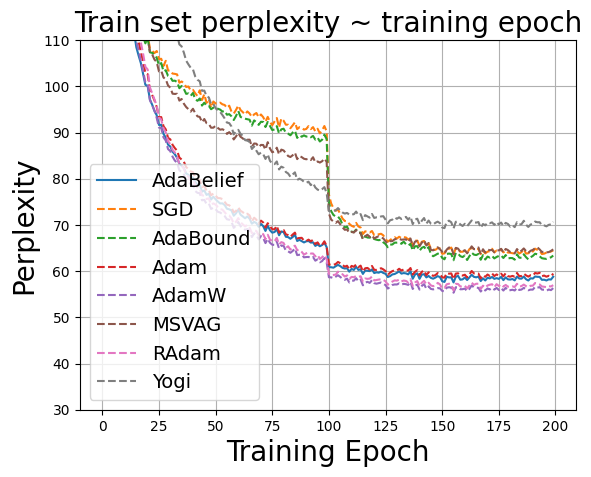

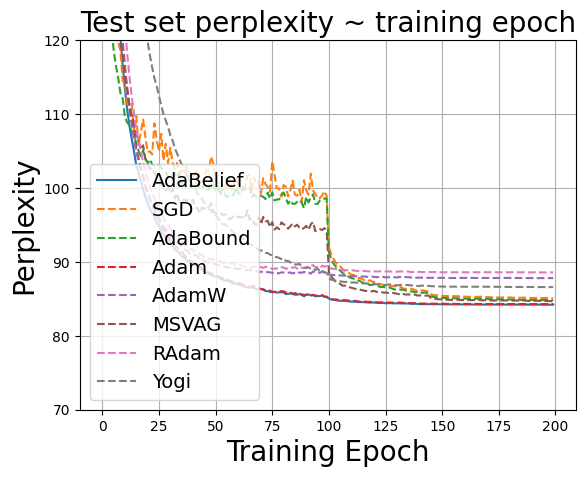

In [19]:
names = [ 'PTB.pt-niter-200-optimizer-adabelief-nlayers1-lr0.001-clip-0.25-eps1e-16-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-sgd-nlayers1-lr30.0-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adabound-nlayers1-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adam-nlayers1-lr0.001-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adamw-nlayers1-lr0.001-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-msvag-nlayers1-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-radam-nlayers1-lr0.001-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-yogi-nlayers1-lr0.01-clip-0.25-eps0.001-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
        ]
labels = ['AdaBelief',
          'SGD',
          'AdaBound',
          'Adam',
          'AdamW',
          'MSVAG',
          'RAdam',
          'Yogi'
        ]
plot(names, 'Train', labels = labels)
plt.savefig('Train_lstm_1layer.png', dpi=600)
plot(names, 'Test', ylim=(70,120), labels = labels)
plt.savefig('Test_lstm_1layer.png', dpi=600)

## 2-layer LSTM

/tmp/ipykernel_908898/236946382.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return {name: torch.load(fp) for name, fp in zip(names, paths)}


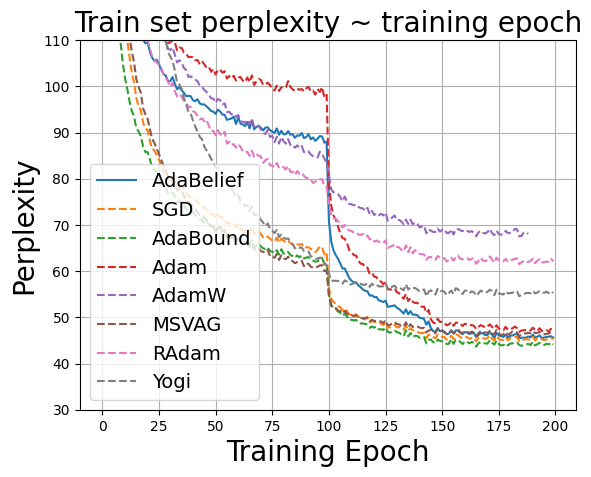

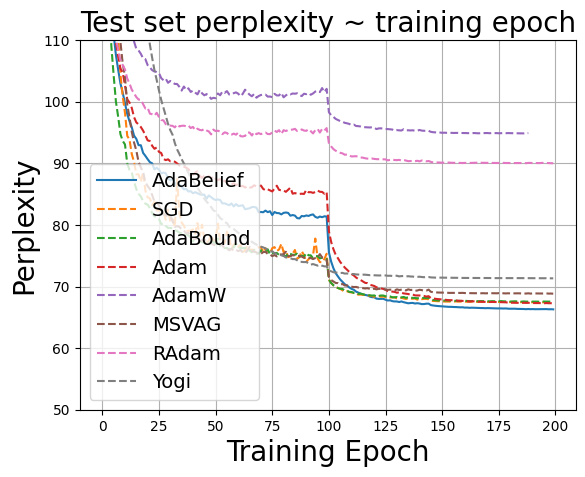

In [20]:
names = [ 'PTB.pt-niter-200-optimizer-adabelief-nlayers2-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]', 
          'PTB.pt-niter-200-optimizer-sgd-nlayers2-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-adabound-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-adam-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-adamw-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-msvag-nlayers2-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-radam-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
         'PTB.pt-niter-200-optimizer-yogi-nlayers2-lr0.01-clip-0.25-eps0.001-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
        ]
labels = ['AdaBelief',
          'SGD',
          'AdaBound',
          'Adam',
          'AdamW',
          'MSVAG',
          'RAdam',
          'Yogi'
        ]
plot(names, 'Train', labels = labels)
plt.savefig('Train_lstm_1layer.png', dpi=600)
plot(names, 'Test', ylim=(50,110), labels = labels)
plt.savefig('Test_lstm_1layer.png', dpi=600)

## 3-layer LSTM

/tmp/ipykernel_908898/236946382.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return {name: torch.load(fp) for name, fp in zip(names, paths)}


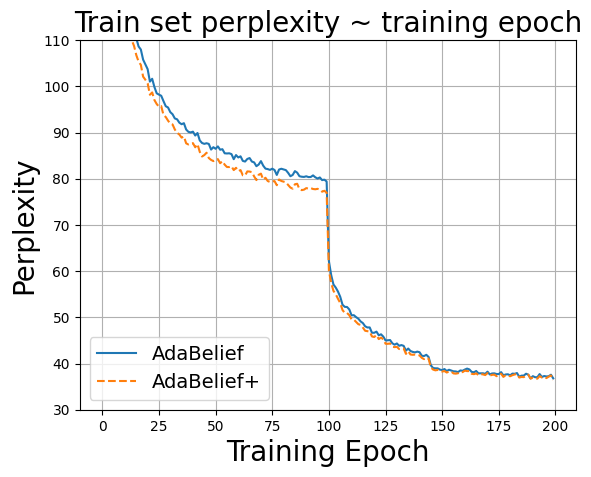

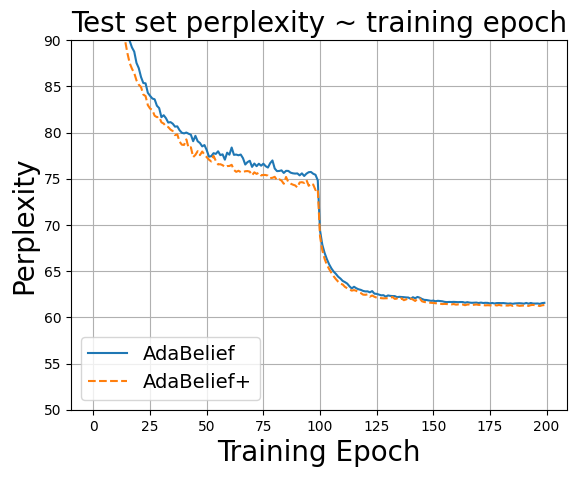

In [21]:
names = [
    'PTB.pt-niter-200-optimizer-adabelief-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed145',
    'PTB.pt-niter-200-optimizer-adabelief+-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt0.0-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]-seed145',
    # 'PTB.pt-niter-200-optimizer-sgd-nlayers3-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    # 'PTB.pt-niter-200-optimizer-adabound-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    # 'PTB.pt-niter-200-optimizer-adam-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    # 'PTB.pt-niter-200-optimizer-adamw-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    # 'PTB.pt-niter-200-optimizer-msvag-nlayers3-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    # 'PTB.pt-niter-200-optimizer-radam-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    # 'PTB.pt-niter-200-optimizer-yogi-nlayers3-lr0.01-clip-0.25-eps0.001-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
    
]
labels = ['AdaBelief',
          'AdaBelief+',
          'SGD',
          'AdaBound',
          'Adam',
          'AdamW',
          'MSVAG',
          'RAdam',
          'Yogi'
        ]
plot(names, 'Train', labels=labels)
# plt.savefig('Train_lstm_3layer.png', dpi=600)
plot(names, 'Test', ylim=(50,90), labels=labels)
# plt.savefig('Test_lstm_3layer.png', dpi=600)
